Directional Waves - `DirectionalWaves` Class
====================================================

In realistic sea states, random waves travel in multiple directions so their spectral distribution lies in the frequency and the spectral domain

We can generate directional waves using the same technique as in plane random waves, using the directional spectrum and linear reconstruction of components in the frequency and directions domain

The following notebook we load the class DirectionalWaves and we plot the free-surface elevation in the x-y (wave propagation plane)

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sys
#Append path of local proteus installation
sys.path.append("C:/Users/present/Desktop/proteus/")
#The notebook will work with the following commit:
#https://github.com/erdc-cm/proteus/commit/9bb34b3563b5ddab6cb1dd9f75173da2710d2a41
from proteus import Profiling,SpatialTools
#import imp
#WT = imp.load_source('WaveTools', 'WaveTools.pyx')
from proteus import WaveTools as WT



#Setting up wave properties
M = 51
Tp = 2. 
Hs = 0.1
depth = 1.
mwl = 0.
N = 11
bandFactor = 1.5
g=np.array([0., 0., -9.81])
spectName = "JONSWAP"
spreadName = "cos2s"
spectral_params = None
spread_params = {"s":15}
phi = None
phiSymm = False
waveDir0 = np.array([1., 1., 0.])

psize=20
#Calling the class
DW = WT.DirectionalWaves(M,
                      Tp,
                      Hs,
                      mwl,
                      depth,
                      waveDir0,
                      g,
                      N,
                      bandFactor,
                      spectName,
                      spreadName,
                      spectral_params,
                      spread_params,
                      phi,
                      phiSymm
                        )

#Plotting a directional spectrum
#Setting space

Plotting the directional spectrum

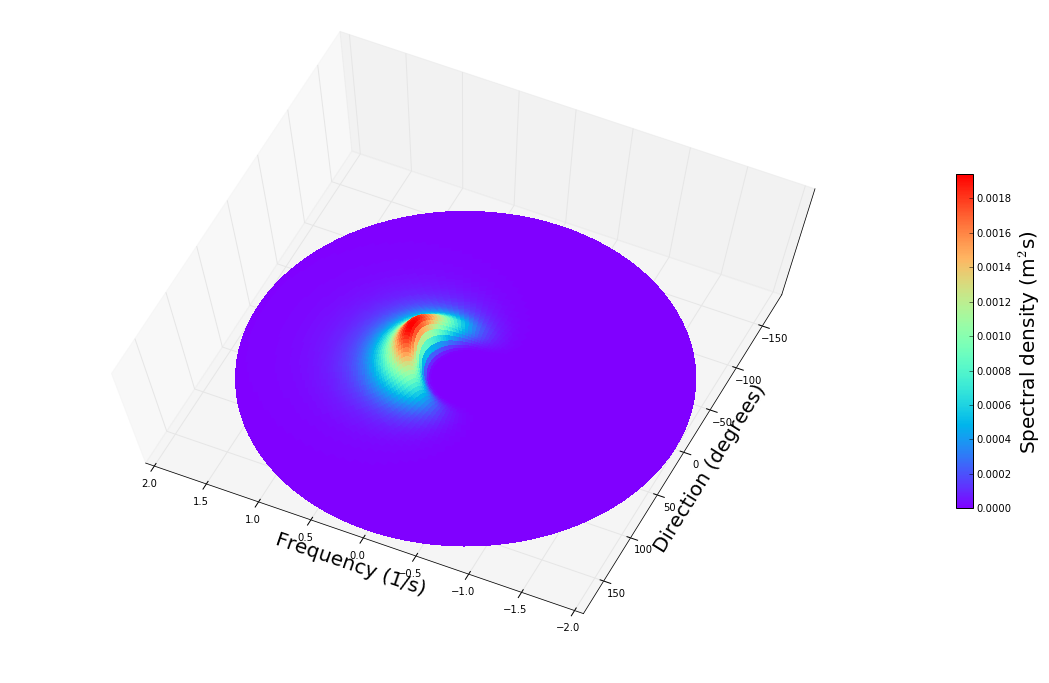

In [7]:
n=100
fi = np.linspace(1e-20,2,n)
di = np.linspace(-np.pi,np.pi,n)
Sdir = WT.JONSWAP(fi,1./Tp,Hs,gamma=1.)*WT.cos2s(di,fi,s=4)
#3D contour
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib import font_manager
fig = plt.figure(45, figsize=(20,12),dpi=500)
ax = fig.gca(projection='3d')
X = fi
Y = di
X, Y = np.meshgrid(X, Y)
X, Y = np.cos(Y)*X, X*np.sin(Y)*90
surf = ax.plot_surface(X, Y, Sdir, rstride=1, cstride=1, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(0))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_ylim(-180, 180)

ax.set_zlim(0, 0.005)
ax.view_init(75,115)
ax.set_xlabel("Frequency (1/s)",size=20)
ax.set_ylabel("Direction (degrees)",size=20)
cb = fig.colorbar(surf,label="Spectral density (m$^2$s)", shrink=.5, aspect=20)
ss = cb.ax
text = ss.yaxis.label
font = font_manager.FontProperties(size=20)
text.set_font_properties(font)
plt.show()

Plotting the free surface elevation

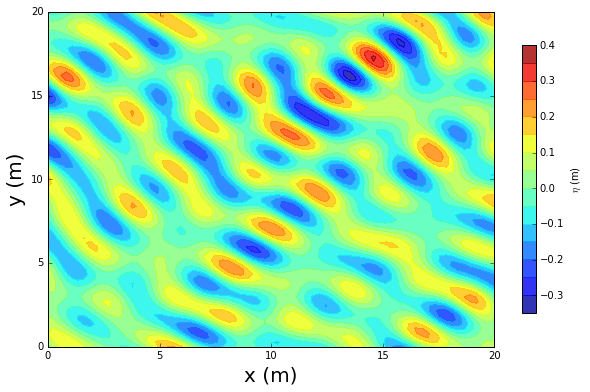

In [9]:
#Setting up the plan view area
n=75
xi = np.linspace(0, 20, n)
yi = np.linspace(0, 20, n)

eta_t = np.zeros((n, n),)

#Calculating the free surface elevation calculated from MWL using a 2D plane
for i in range(len(xi)):
    for j in range(len(yi)):
        x = [xi[i], yi[j], 0]
        eta_t[i,j] = DW.eta(x, 0.)

        
#Plotting the contour            
plt.figure(1, figsize=(10,6), dpi=100)
X,Y = np.meshgrid(xi, yi)
CS = plt.contourf(X, Y, eta_t, 16, alpha=0.8, cmap='jet')
plt.xlabel("x (m)", size=psize)
plt.ylabel("y (m)", size=psize)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
CB.set_label("$\eta$ (m)", size = 10)
plt.show()
